In [89]:
import pandas as pd
resourceDf = pd.read_json("../data/beta/resource.json") 
applicationDf = pd.read_json("../data/beta/application.json")
paDf = pd.read_json("../data/beta/productApplication.json")
serverDf = pd.read_json("../data/beta/server.json")

In [90]:
serverResourceDf = resourceDf[
    resourceDf["type"].isin(['server','legacy-server','legacy-physical-server'])]

total_resource_count = serverResourceDf.shape[0]
total_server_count =serverDf.shape[0]
serverResourceDf.shape

(644, 10)

In [91]:
import json
defaultPA = json.loads(paDf[paDf["name"]=='default'].to_json())
default_pa_id = defaultPA['_id']['0']['$oid']
print(default_pa_id)

61d3cd987d7ab1f2dc6bab0d


In [92]:
pd.set_option('mode.chained_assignment',  None) 

applicationDf["parentGroup"] = applicationDf["parentGroup"].apply(lambda x : x['_id']['$oid'])
applicationDf["_id"] = applicationDf["_id"].apply(lambda x : x['$oid'])
serverResourceDf["parentGroups"]= serverResourceDf["parentGroups"].apply(lambda x : x[0]['_id']['$oid'])

In [93]:
lookupServerApplicationDf = pd.merge(left = serverResourceDf , right = applicationDf, left_on='parentGroups', right_on='_id', how = "left" ,suffixes=["_resource","_application"])

In [94]:
non_default_pa_server = lookupServerApplicationDf[lookupServerApplicationDf["parentGroup"] != default_pa_id]
non_default_pa_server.dropna(axis=0,how='any',subset=["parentGroup","parentGroups"],inplace = True)
registered_server_count= non_default_pa_server.shape[0]
print(registered_server_count)

195


([<matplotlib.patches.Wedge at 0x3be4fae20>,
 [Text(-0.9656398657789, 0.5268203200508766, 'server'),
  Text(0.8233618715824629, -0.7294348692133, 'legacy_server'),
  Text(1.072138337350572, -0.2460068811703273, 'legacy_physical_server')],
 [Text(-0.5267126540612181, 0.287356538209569, '84.103%'),
  Text(0.4491064754086161, -0.3978735650254363, '8.718%'),
  Text(0.5848027294639483, -0.13418557154745123, '7.179%')])

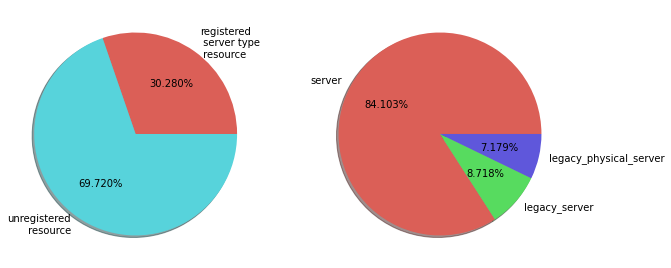

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
registered_server_count= non_default_pa_server.shape[0]
unregistered_server_count=total_resource_count-registered_server_count
values = [registered_server_count, unregistered_server_count]
labels = ["registered\n server type\n resource", "unregistered\n resource"]
colors = sns.color_palette('hls',len(labels))

plt.subplot(1,2,1)
plt.pie(values,labels=labels, autopct='%.3f%%', colors = colors, shadow=True)

server_count = non_default_pa_server[non_default_pa_server["type"]=="server"].shape[0]
legacy_server_count= non_default_pa_server[non_default_pa_server["type"]=="legacy-server"].shape[0]
legacy_physical_server_count=non_default_pa_server[non_default_pa_server["type"]=="legacy-physical-server"].shape[0]

values2 = [server_count,legacy_server_count,legacy_physical_server_count ]
labels2 = ["server", "legacy_server", "legacy_physical_server"]
colors2 = sns.color_palette('hls',len(labels2))

plt.subplot(1,2,2)
plt.pie(values2,labels=labels2, autopct='%.3f%%', colors = colors2, shadow=True)

([<matplotlib.patches.Wedge at 0x3c3a3a4f0>,
 [Text(0.5359592208488059, 0.9605975815018176, 'registered\n server type\n resource'),
  Text(-0.5359593107864404, -0.9605975313216893, 'unregistered\n server')],
 [Text(0.2923413931902577, 0.5239623171828095, '33.801%'),
  Text(-0.2923414422471493, -0.5239622898118305, '66.199%')])

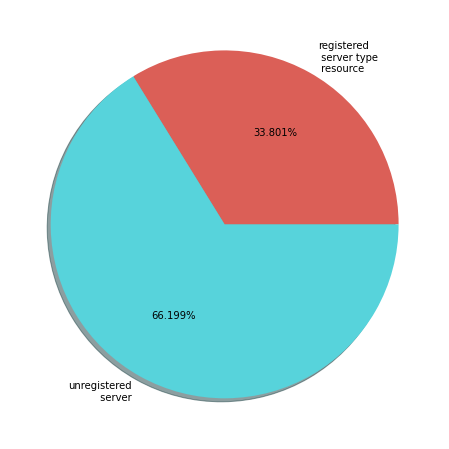

In [87]:
plt.figure(figsize=(10,8))

values3 = [registered_server_count, total_server_count-registered_server_count]
labels3 = ["registered\n server type\n resource", "unregistered\n server"]
colors3 = sns.color_palette('hls',len(labels))
plt.pie(values3,labels=labels3, autopct='%.3f%%', colors = colors3, shadow=True)

In [88]:
! git add .
! git commit -m "server filtering"
! git push origin master

[master 32da986] server filtering
 1 file changed, 268 insertions(+), 238 deletions(-)
 rewrite resource_server_registration_rate.ipynb (92%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 10 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 47.48 KiB | 11.87 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/2jimoo/data_stastics
   5028913..32da986  master -> master
